# 导入支持库

In [1020]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from pandas import Series, DataFrame


#在GUI中显示
# %matplotlib tk 
#在行内显示(默认)
%matplotlib inline

mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False


# 载入数据 合并数据 data_obj

In [226]:

users_df = pd.read_csv('./data/users.dat', sep='::', engine='python', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])
movies_df = pd.read_csv('./data/movies.dat', sep='::', engine='python', names=['MovieID', 'Title', 'Genres'])
ratings_df = pd.read_csv('./data/ratings.dat', sep='::', engine='python', names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
# print(users_df)
# print(movies_df)
# print(ratings_df)

combine_movies_ratings_df = pd.merge(movies_df, ratings_df, on='MovieID')
combine_movies_ratings_users_df = pd.merge(combine_movies_ratings_df, users_df, on='UserID')
data_obj = combine_movies_ratings_users_df
data_obj

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
5,531,"Secret Garden, The (1993)",Children's|Drama,1,4,978302149,F,1,10,48067
6,588,Aladdin (1992),Animation|Children's|Comedy|Musical,1,4,978824268,F,1,10,48067
7,594,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical,1,4,978302268,F,1,10,48067
8,595,Beauty and the Beast (1991),Animation|Children's|Musical,1,5,978824268,F,1,10,48067
9,608,Fargo (1996),Crime|Drama|Thriller,1,4,978301398,F,1,10,48067


# 1.查看每部电影中两类性别的平均分

In [79]:
# a_movie = data_obj.groupby(['MovieID', 'Gender']).mean()
# out = DataFrame(a_movie['Rating'])
# out
out = DataFrame.pivot_table(data_obj, values='Rating', index='MovieID', columns='Gender', aggfunc='mean')
out

Gender,F,M
MovieID,,
1,4.444444,4.285714
2,3.666667,3.500000
3,2.500000,2.000000
4,NaN,3.000000
5,NaN,4.000000
6,3.000000,4.000000
7,2.750000,3.500000
9,NaN,5.000000
10,5.000000,3.714286


# 2.查看每部电影中两类性别的均分差异最大的前3的电影

In [113]:
noNaN = out.dropna()
noNaN = noNaN.copy()
noNaN['|F-M|'] = abs(noNaN['F'] - noNaN['M'])
noNaN.sort_values("|F-M|",ascending=False)
noNaN.head(3)

Gender,F,M,|F-M|
MovieID,,,
1,4.444444,4.285714,0.158730
2,3.666667,3.500000,0.166667
3,2.500000,2.000000,0.500000


# 3.查找出热门电影热度榜单 （计算表中电影出现的次数，取前3）

In [275]:
ratings_df.groupby('MovieID').count().sort_values('UserID', ascending=False).head(3)

,UserID,Rating,Timestamp
MovieID,,,
2858,3428,3428,3428
260,2991,2991,2991
1196,2990,2990,2990


# 4.每部电影的评分（平均分）  获取排名前10的高分榜单

In [141]:
DataFrame(ratings_df.groupby('MovieID').mean().sort_values('Rating', ascending=False)['Rating'].head(10))

,Rating
MovieID,
1978,5.0
1611,5.0
1963,5.0
1950,5.0
1939,5.0
1937,5.0
1827,5.0
1821,5.0
1769,5.0


# 5.前十大热门电影__的评分

In [274]:
hot = ratings_df.groupby('MovieID').count().sort_values('UserID', ascending=False)['Rating']
DataFrame(hot.head(10))

,Rating
MovieID,
2858,3428
260,2991
1196,2990
1210,2883
480,2672
2028,2653
589,2649
2571,2590
1270,2583


# 6.前20名高分电影的__热度 (使用第3.热度表)

In [276]:
height20 = ratings_df.groupby('MovieID').mean().sort_values('Rating', ascending=False)['Rating']
DataFrame(height20.head(20))

,Rating
MovieID,
989,5.000000
3881,5.000000
1830,5.000000
3382,5.000000
787,5.000000
3280,5.000000
3607,5.000000
3233,5.000000
3172,5.000000


# 7.查询出前十好电影 
###  好电影：
###  1.看的人多（点击在1000以上）
### 2.分数还高（按Rating降序）

In [277]:
DataFrame(height20[hot[hot>1000].head(20).index].sort_values(ascending=False))

,Rating
MovieID,
527,4.510417
1198,4.477725
260,4.453694
2762,4.406263
593,4.351823
2028,4.337354
2858,4.317386
2571,4.315830
1197,4.303710


# - - - - - - - - - - - - - - - - - - - - - - - - -

# 使用的数据集是美国人口普查的数据

In [286]:
census_df = pd.read_csv('./data/census.csv', engine='python')
census_df


,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-30.953709,-5.180127,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-14.032727,-11.684234,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-6.155670,-4.611706,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,-2.731639,3.849092,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901


# 2010年中 以每个州(STNAME)人口中 最多的 3 个县的人口总和为这个州人口的衡量标准，问哪 3 个州对应的人口最多？

In [329]:
DataFrame(census_df.sort_values(['STNAME', 'POPESTIMATE2010'],ascending=[True,False]).groupby(['STNAME']).head(3).groupby('STNAME')['POPESTIMATE2010'].sum().sort_values(ascending=False).head(3))


,POPESTIMATE2010
STNAME,
California,50264474
Texas,31726014
New York,24148828


# 各个州、县 在 2010 年至 2012 年间人口平均量是怎么样的？

In [351]:
temp = census_df[["POPESTIMATE2010","POPESTIMATE2011","POPESTIMATE2012"]]
# census_df["three-year-total"] = temp.sum(axis=1) #axis 0为列，1为行
census_df["three-year-avg"] = temp.mean(axis=1)
# census_df[['STNAME', 'CTYNAME', 'three-year-total', 'three-year-avg']]
census_df[['STNAME', 'CTYNAME', 'three-year-avg']].head(10)

,STNAME,CTYNAME,three-year-avg
0,Alabama,Alabama,4.800786e+06
1,Alabama,Autauga County,5.502933e+04
2,Alabama,Baldwin County,1.867493e+05
3,Alabama,Barbour County,2.724200e+04
4,Alabama,Bibb County,2.274533e+04
5,Alabama,Blount County,5.762000e+04
6,Alabama,Bullock County,1.070733e+04
7,Alabama,Butler County,2.067500e+04
8,Alabama,Calhoun County,1.178303e+05
9,Alabama,Chambers County,3.405533e+04


# 在 2010 年至 2012 年间人口增加数量最多的是哪3个县？

In [352]:
census_df['Δ/➖'] = census_df['POPESTIMATE2012'] - census_df['POPESTIMATE2010']
DataFrame(census_df[['STNAME', 'CTYNAME', 'Δ/➖']].sort_values('Δ/➖', ascending=False).head(3))

,STNAME,CTYNAME,Δ/➖
2566,Texas,Texas,845378
190,California,California,721976
329,Florida,Florida,502131


# yuehui.163.com 数据分析

In [1041]:
girls_df = pd.read_csv('./data/girls', encoding='utf-8', sep='::', engine='python')
girls_df.head(10)

,会员ID,昵称,年龄,省市,市区县,星座,学历,学历转分数,工资,婚否,身高,体重,职业,性别,头像
0,30135985,做个小女人,47,北京,朝阳区,狮子座,本科,60,9000,1,162,70,其他行业,0,http://yuehui1.nos.netease.com/images/portrait...
1,37827353,云海,35,北京,西城区,摩羯座,硕士,70,0,1,169,55,主管/经理,0,http://yuehui1.nos.netease.com/images/portrait...
2,47845164,紫色柔情,47,北京,海淀区,摩羯座,本科,60,6500,1,163,55,教师,0,http://yuehui1.nos.netease.com/images/portrait...
3,615430496,回眸一笑,48,北京,海淀区,摩羯座,本科,60,6500,1,163,54,教师,0,http://yuehui1.nos.netease.com/images/portrait...
4,615995687,空谷幽兰,47,北京,海淀区,摩羯座,本科,60,6500,1,163,55,教师,0,http://yuehui1.nos.netease.com/images/portrait...
5,32714149,风中百合,65,北京,西城区,射手座,本科,60,6500,1,163,50,其他行业,0,http://yuehui1.nos.netease.com/images/portrait...
6,15735842,小草,55,北京,空,水瓶座,本科,60,2500,1,165,58,工程师,0,http://yuehui1.nos.netease.com/images/portrait...
7,700172079,回眸一笑,50,北京,朝阳区,天蝎座,专科,50,9000,1,163,60,传媒/影视,0,http://yuehui1.nos.netease.com/images/portrait...
8,19335879,雨后彩虹,56,北京,朝阳区,摩羯座,专科,50,6500,1,168,63,其他行业,0,http://yuehui1.nos.netease.com/images/portrait...
9,30493341,烟雨蒙蒙,46,北京,东城区,水瓶座,本科,60,0,1,160,59,其他行业,0,http://yuehui1.nos.netease.com/images/portrait...


# -1. 得到男女生数据总和

In [1042]:
sex_count = DataFrame(girls_df.groupby('性别').count()['会员ID'])
sex_count.rename(columns={'会员ID': '人数'}, inplace=True)
sex_count

,人数
性别,
0,25484
1,19197


# 0. 分析每个地区的男女生比例

In [1043]:
temp_copy = girls_df
# 改名
temp_copy['性别'] = girls_df['性别'].replace([0,1],['女','男'])
# 总和
total = temp_copy.groupby('省市')[['会员ID']].count()
# 人数 / 总和
province_sex = temp_copy.groupby(['省市', '性别'])[['会员ID']].count()
evey_province_sex_percent = province_sex / total
evey_province_sex_percent.rename(columns={'会员ID': '人数所占百分比'}, inplace=True)
evey_province_sex_percent


人数所占百分比
省市   性别          
上海   女   0.821717
     男   0.178283
乌鲁木齐 女   0.413987
     男   0.586013
兰州   女   0.473684
     男   0.526316
北京   女   0.819867
     男   0.180133
南京   女   0.571429
     男   0.428571
南宁   女   0.583333
     男   0.416667
南昌   女   0.363636
     男   0.636364
台湾   女   0.615385
     男   0.384615
合肥   女   0.461538
     男   0.538462
呼和浩特 女   0.615385
     男   0.384615
哈尔滨  女   0.552898
     男   0.447102
天津   女   0.872491
     男   0.127509
太原   女   0.600000
     男   0.400000
广州   女   0.600000
     男   0.400000
成都   女   0.388889
     男   0.611111
...           ...
沈阳   女   0.625578
     男   0.374422
济南   女   0.700000
     男   0.300000
海口   女   0.475000
     男   0.525000
澳门   女   0.333333
     男   0.666667
石家庄  女   0.700000
     男   0.300000
福州   女   0.416667
     男   0.583333
西宁   女   0.526316
     男   0.473684
西安   女   0.546218
     男   0.453782
贵阳   女   0.666667
     男   0.333333
郑州   女   0.413043
     男   0.586957
重庆   女   0.663551
     男   0.336449
银川   女   0.459550
     男   0.540450
长春   女   0.500000
     男   0.500000
长沙   女   0.526316
     男   0.473684
香港   女   0.410324
     男   0.589676

[68 rows x 1 columns]

# 1.	查看那5个星座发布的交友信息最多

In [1044]:
# 计数
mostPostStart = DataFrame(girls_df.groupby('星座').count()['会员ID'])
# 改一下列名
mostPostStart.rename(columns={'会员ID': '发部次数'}, inplace=True)
# 输出前5
mostPostStart.sort_values(by='发部次数', ascending=False).head(5)


,发部次数
星座,
摩羯座,6053
双子座,5331
天秤座,3806
金牛座,3492
巨蟹座,3422


# 2. 查看薪资排名前10 的省份
### 薪资为保密,0,空值的不进行计算
### 薪资在区间内的取其均值
### 50000以上的视为50000  2000以下的视为2000

In [1045]:
# 过滤掉工资为 -1 的行 不统计
have_income = girls_df[~girls_df['工资'].isin([-1])]

# 省份人数总工资 / 计数
DataFrame(have_income.groupby('省市').sum()['工资'] / girls_df.groupby('省市').count()['会员ID'], columns=['平均薪资']).sort_values(by='平均薪资', ascending=False).head(10)


,平均薪资
省市,
香港,14634.017207
澳门,12677.777778
台湾,10237.891738
杭州,9697.530864
成都,9047.668038
北京,8617.494440
南京,8280.864198
福州,8011.316872
长沙,7850.227420


# 3. 查看哪10个年龄的交友需求比较多 (过滤掉所有无效数据)

In [1046]:
# 计数
mostPostAge = DataFrame(girls_df.groupby('年龄').count()['会员ID'].sort_values(ascending=False))
mostPostAge.rename(columns={'会员ID': '发布次数'}, inplace=True)
mostPostAge.head(10)


,发布次数
年龄,
36,2134
37,2054
34,1925
32,1913
29,1898
33,1855
35,1852
31,1846
39,1839


# 4. 得到各个年龄段的男女的人数

In [1047]:
# 创建副本
temp_copy = girls_df
temp_copy['性别']=temp_copy['性别'].replace([0,1],['女','男'])
# 按年龄 性别 计算数量
all_age_count = DataFrame(DataFrame(temp_copy.groupby(['年龄', '性别']).count())['会员ID'])
all_age_count.rename(columns={'会员ID': '人数'}, inplace=True)
all_age_count


人数
年龄 性别      
18 女     99
   男     68
19 女    135
   男     88
20 女    132
   男    108
21 女    216
   男    116
22 女    456
   男    257
23 女    326
   男    132
24 女    472
   男    154
25 女    495
   男    179
26 女    824
   男    206
27 女    903
   男    252
28 女   1103
   男    358
29 女   1344
   男    554
30 女   1251
   男    542
31 女   1255
   男    591
32 女   1201
   男    712
...     ...
74 女      2
   男      2
75 男      6
76 女     11
   男      6
77 女      2
   男      5
78 女     17
   男      6
79 女     16
   男     15
80 女     15
   男     17
81 女      4
   男     12
82 男     17
83 女     14
   男     11
84 女     15
   男     29
85 女     23
   男     17
86 女     11
   男      9
87 女      8
   男      6
88 女     59
   男     45
89 女    142
   男    107

[142 rows x 1 columns]

# 5. 各个学历的占比

In [1076]:
# 合并 空 和 高中以下学历
# girls_df['学历']=girls_df['学历'].replace(['空'],['高中以下'])
# degree_percent.groupby(['学历']).count()
# temp_copy.groupby(['学历']).count()
# 计算 每个学历 对应的总数
degree_temp = DataFrame(DataFrame(temp_copy.groupby(['学历']).count())['会员ID'])
# degree_temp
# 换列名
degree_temp.rename(columns={'会员ID': '百分比'}, inplace=True)

# degree_temp

# degree_temp['学历']['高中以下'] + degree_temp['学历']['空'] 

# 按列计算每个元素所占百分比
DataFrame(degree_temp['百分比'].apply(lambda x :str((x/degree_temp['百分比'].sum()) * 100) + '%')).sort_values(by='百分比', ascending=False)


,百分比
学历,
高中,8.690494841207672%
高中以下,8.430876658982566%
空,6.049551263400551%
硕士,5.049126026722768%
本科,46.08894160828988%
专科,24.03706273360041%
博士,1.6539468677961549%


# 6. 得出前10个平均学历最高的城市
### 无学历的默认为高中学历
### 假设学历满分为100
### 高中以下30分，高中40分，专科50分，本科60分，硕士70分，博士80分

In [1049]:
degree_height = girls_df.groupby(['省市', '市区县']).mean().sort_values(by='学历转分数', ascending=False)[['学历转分数']]
# 换列名
degree_height.rename(columns={'学历转分数': '平均学历分数'}, inplace=True)
degree_height.head(10)


平均学历分数
省市  市区县            
哈尔滨 宁安市   80.000000
    抚远县   70.000000
南宁  隆安县   66.666667
石家庄 元氏县   60.000000
哈尔滨 东宁县   60.000000
    木兰县   60.000000
石家庄 栾城县   60.000000
南京  空     58.252427
    白下区   58.000000
哈尔滨 让胡路区  58.000000

# 7. 得到身材相对匀称 人数最多的10个省份
### 按照BMI指数得到结果
### 按照：70kg÷（1.75×1.75）=22.86)的比例  
### 结果 如果在18.5-23.9之间的 属于标准身材

In [1067]:
body_thin = girls_df
# body_thin.copy()
# 过滤掉 身高 / 体重 为 0 的行 不统计
body_thin = body_thin[~body_thin['身高'].isin([0])]
body_thin = body_thin.copy()

body_thin['BMI'] = body_thin['体重'] / (body_thin['身高'] * body_thin['身高'] / 10000)

thin_filter = body_thin[(body_thin['BMI'] >= 18.5) & (body_thin['BMI'] <= 23.9)]
thin_temp = thin_filter.groupby('省市').count()[['会员ID']].sort_values(by='会员ID', ascending=False).head(10)
thin_temp

,会员ID
省市,
北京,1657
上海,1492
天津,1271
重庆,1037
成都,915
长沙,880
兰州,804
西宁,778
西安,771


# 8. 三个图
### 身高 体重散点图
### top10 薪资省份（图任选）
### 满足bmi指数的人数最多的10个省份（柱状图，类似效果）

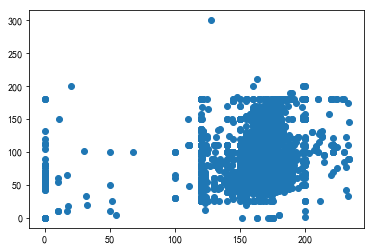

In [1051]:
temp = girls_df
temp = temp[(girls_df['身高'] < 240) & (girls_df['体重'] < 400)]
plt.scatter(temp['身高'], temp['体重'])

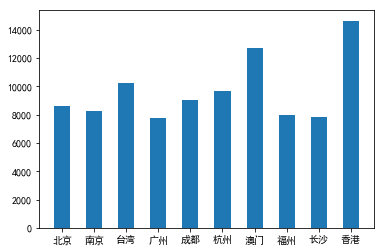

In [1052]:
# 过滤掉工资为 -1 的行 不统计
# 省份人数总工资 / 计数
income_10 = DataFrame(girls_df[~girls_df['工资'].isin([-1])].groupby('省市').sum()['工资'] / girls_df.groupby('省市').count()['会员ID'], columns=['平均薪资']).sort_values(by='平均薪资', ascending=False).head(10)
plt.bar(Series(income_10.index), income_10['平均薪资'], width=0.5)
plt.show()


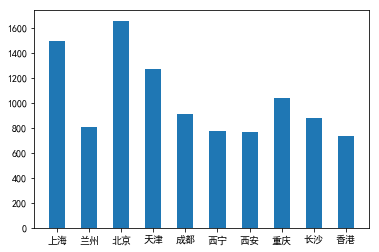

In [1074]:
plt.bar(Series(thin_temp.index), thin_temp['会员ID'], width=0.5)
plt.show()
